<a href="https://colab.research.google.com/github/DiSolo28/ML/blob/main/ML%205%20%D0%BB%D0%B0%D0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/diamond.csv')
except FileNotFoundError:
    df = pd.read_csv('diamond.csv')

# Определение соответствий для замены Cut
cut_mapping = {'Ideal': 80, 'Good': 30, 'Very Good': 50, 'Fair': 10, 'Signature-Ideal': 100}

# Замена Cut
df['Cut'] = df['Cut'].replace(cut_mapping)

# Определение соответствий для замены Color
color_mapping = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6}

# Замена Color
df['Color'] = df['Color'].replace(color_mapping)

# Определение соответствий для замены Clarity
clarity_mapping = {'FL': 10, 'IF': 20, 'VVS1': 30, 'VVS2': 40, 'VS1': 50, 'VS2':60, 'SI1':70}

# Замена Clarity
df['Clarity'] = df['Clarity'].replace(clarity_mapping)

# Определение соответствий для замены Polish
polish_mapping = {'EX': 1, 'ID': 2, 'VG': 3, 'G': 4}

# Замена Polish
df['Polish'] = df['Polish'].replace(polish_mapping)

# Определение соответствий для замены Symmetry
symmetry_mapping = {'EX': 1, 'ID': 2, 'VG': 3, 'G': 4}

# Замена Symmetry
df['Symmetry'] = df['Symmetry'].replace(symmetry_mapping)

# Определение соответствий для замены Report
report_mapping = {'GIA': 1, 'AGSL': 2}

# Замена Report
df['Report'] = df['Report'].replace(report_mapping)

y = df['Carat Weight'] # выбираем целевую переменную (количественная)
X = df.drop('Carat Weight', axis=1) # переменные для проверки влияния

<ipython-input-31-079bd27e11b7>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cut'] = df['Cut'].replace(cut_mapping)
<ipython-input-31-079bd27e11b7>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Color'] = df['Color'].replace(color_mapping)
<ipython-input-31-079bd27e11b7>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future

In [32]:
X

,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,80,5,70,3,1,1,5169
1,80,5,50,2,2,2,3470
2,80,5,70,1,1,1,3183
3,80,2,70,3,3,1,4370
4,80,4,70,1,1,1,3171
...,...,...,...,...,...,...,...
5995,80,1,70,1,1,1,6250
5996,50,1,70,3,3,1,5328
5997,80,1,70,1,1,1,6157
5998,100,4,50,1,1,1,11206


In [33]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [34]:
X

,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,80,5,70,3,1,1,5169
1,80,5,50,2,2,2,3470
2,80,5,70,1,1,1,3183
3,80,2,70,3,3,1,4370
4,80,4,70,1,1,1,3171
...,...,...,...,...,...,...,...
5995,80,1,70,1,1,1,6250
5996,50,1,70,3,3,1,5328
5997,80,1,70,1,1,1,6157
5998,100,4,50,1,1,1,11206


In [35]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,Cut,Color,Clarity,Polish,Symmetry,Report,Price,y
0,80,5,70,3,1,1,5169,1.10
1,80,5,50,2,2,2,3470,0.83
2,80,5,70,1,1,1,3183,0.85
3,80,2,70,3,3,1,4370,0.91
4,80,4,70,1,1,1,3171,0.83
...,...,...,...,...,...,...,...,...
5995,80,1,70,1,1,1,6250,1.03
5996,50,1,70,3,3,1,5328,1.00
5997,80,1,70,1,1,1,6157,1.02
5998,100,4,50,1,1,1,11206,1.27


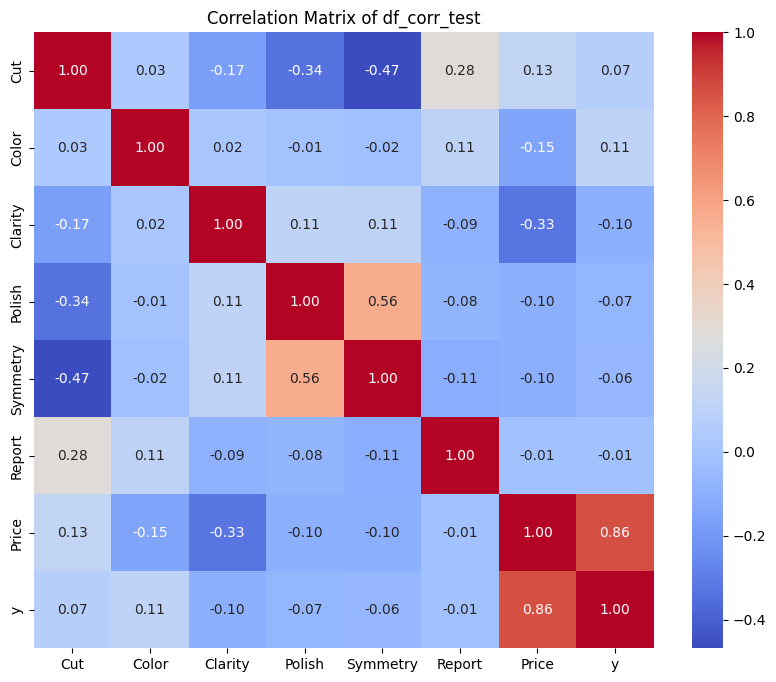

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [38]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешат

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.04
R^2 Score: 0.82


In [39]:
resolve_regression(X[['Price']], y)
None

Regularization: None
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.06
R^2 Score: 0.71


In [40]:
X

,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,80,5,70,3,1,1,5169
1,80,5,50,2,2,2,3470
2,80,5,70,1,1,1,3183
3,80,2,70,3,3,1,4370
4,80,4,70,1,1,1,3171
...,...,...,...,...,...,...,...
5995,80,1,70,1,1,1,6250
5996,50,1,70,3,3,1,5328
5997,80,1,70,1,1,1,6157
5998,100,4,50,1,1,1,11206


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Cut       6000 non-null   int64
 1   Color     6000 non-null   int64
 2   Clarity   6000 non-null   int64
 3   Polish    6000 non-null   int64
 4   Symmetry  6000 non-null   int64
 5   Report    6000 non-null   int64
 6   Price     6000 non-null   int64
dtypes: int64(7)
memory usage: 328.2 KB


In [42]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

In [44]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)

In [45]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.04
R^2 Score: 0.82


In [46]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.21
R^2 Score: 0.02


Regularization: None
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.21
R^2 Score: 0.02


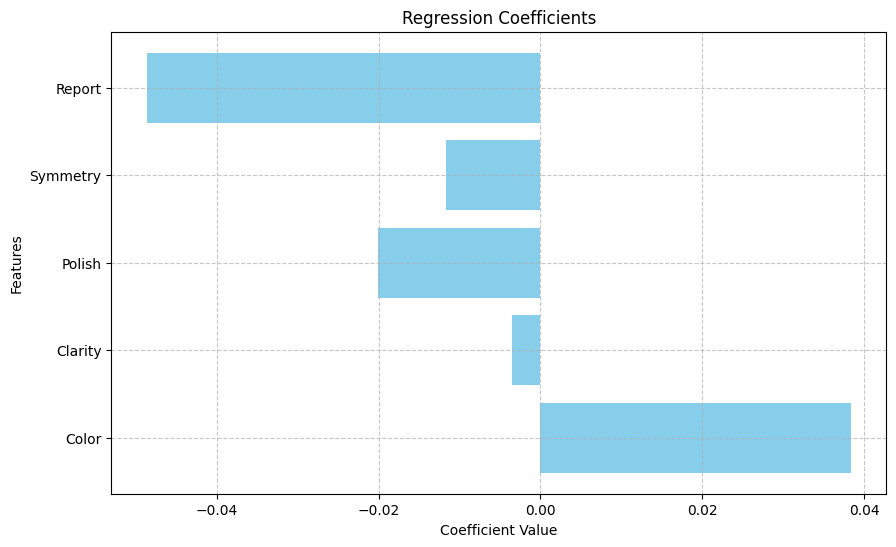

In [47]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

In [50]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64', 'int64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])

<ipython-input-50-7665d01e6b99>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [51]:
X_selected_rfe

,Color,Clarity,Polish,Symmetry,Report
0,0.8,1.000000,0.666667,0.000000,0.0
1,0.8,0.666667,0.333333,0.333333,1.0
2,0.8,1.000000,0.000000,0.000000,0.0
3,0.2,1.000000,0.666667,0.666667,0.0
4,0.6,1.000000,0.000000,0.000000,0.0
...,...,...,...,...,...
5995,0.0,1.000000,0.000000,0.000000,0.0
5996,0.0,1.000000,0.666667,0.666667,0.0
5997,0.0,1.000000,0.000000,0.000000,0.0
5998,0.6,0.666667,0.000000,0.000000,0.0


Regularization: None
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.21
R^2 Score: 0.02


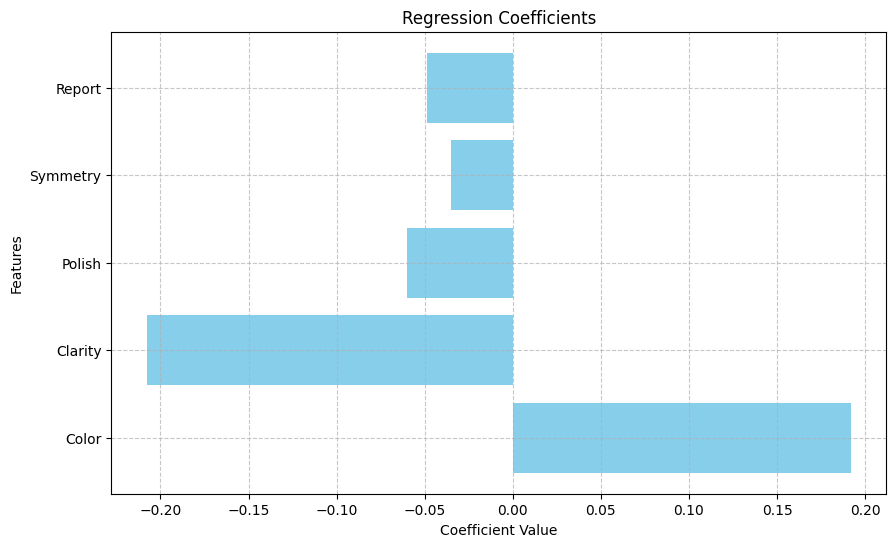

In [52]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

## **Метрики**

In [53]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.21
R^2 Score: 0.02


## **Регуляризация**

In [54]:
X

,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,80,5,70,3,1,1,5169
1,80,5,50,2,2,2,3470
2,80,5,70,1,1,1,3183
3,80,2,70,3,3,1,4370
4,80,4,70,1,1,1,3171
...,...,...,...,...,...,...,...
5995,80,1,70,1,1,1,6250
5996,50,1,70,3,3,1,5328
5997,80,1,70,1,1,1,6157
5998,100,4,50,1,1,1,11206


Regularization: l1
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.06
R^2 Score: 0.73


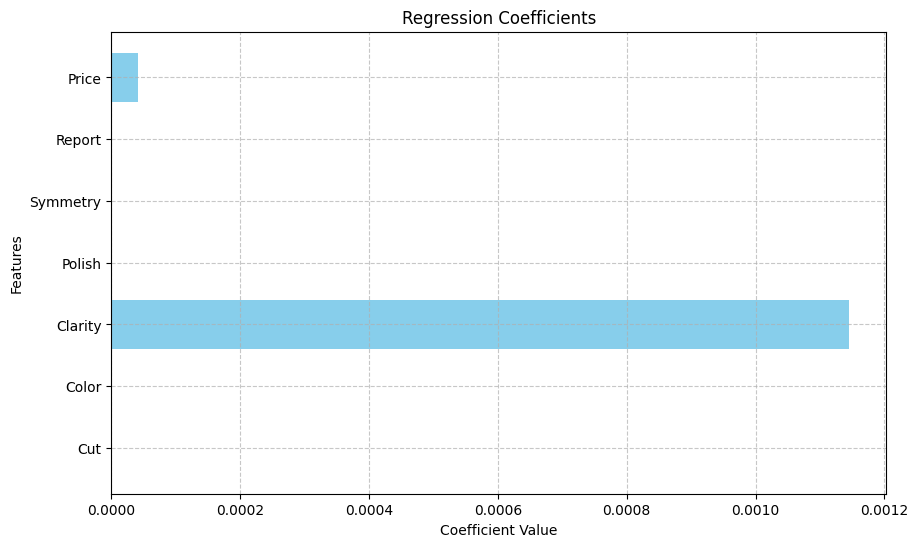

In [55]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: l2
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.04
R^2 Score: 0.82


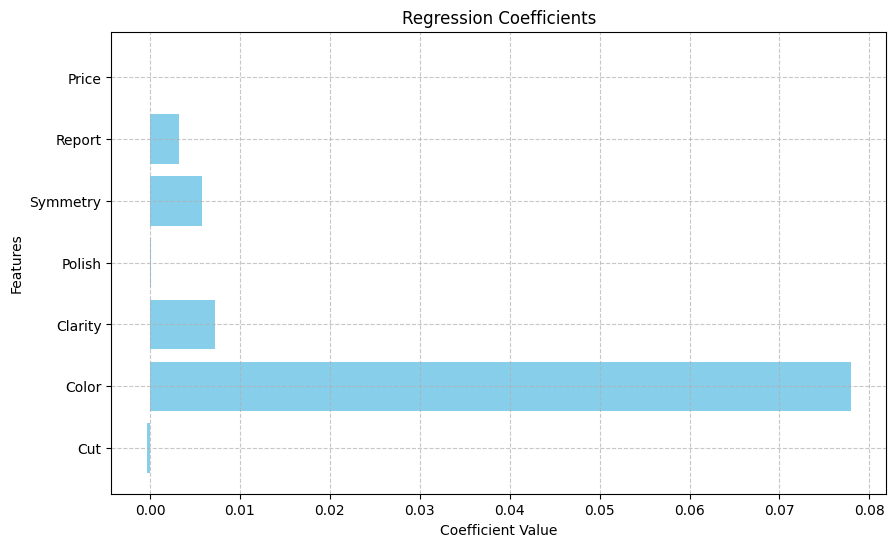

In [56]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.04
R^2 Score: 0.82


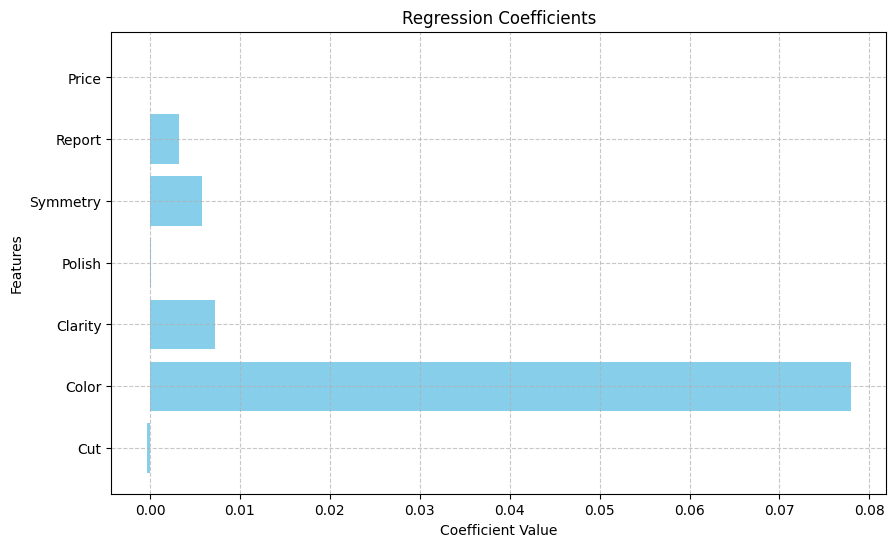

In [57]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)